<a href="https://colab.research.google.com/github/zziziz/2025-1-BDA/blob/main/inclass/07w_A_mon_0421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##단원07 데이터 정제

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df.score + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0
4,NaN


In [4]:
pd.isna(df) #df의 데이터값을 boolean값으로 반환

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:
pd.isnull(df)#위의 코드와 동일

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [6]:
pd.isna(df).sum() #각 열마다 true의 개수를 반환

,0
sex,1
score,1


In [7]:
pd.isna(df).sum(axis='index')

,0
sex,1
score,1


In [8]:
pd.isna(df).sum(axis=1)

,0
0,0
1,0
2,1
3,0
4,1


In [9]:
df.isna().sum(axis='index')

,0
sex,1
score,1


In [11]:
df.isna().sum(axis=0)

,0
sex,1
score,1


In [12]:
df.isna().sum(axis=1)

,0
0,0
1,0
2,1
3,0
4,1


In [13]:
s=pd.Series([True, False, True])
s

,0
0,True
1,False
2,True


In [14]:
s.sum()

np.int64(2)

In [15]:
s.any() #any()는 시리즈에 True가 하나라도 있으면 True를 반환

np.True_

In [16]:
s.all()#all()은 시리즈의 모든 값이 True일 때만 True를 반환

np.False_

In [17]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [19]:
df.isna().any()#열별로 결측치가 하나라도 있으면 True

,0
sex,True
score,True


In [20]:
df.notna()#isna()의 반대

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [21]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [22]:
df.isna().all() #열별로 모두 결측치이면 True

,0
sex,False
score,False


In [23]:
df.isna().any()

,0
sex,True
score,True


In [25]:
df.isna().any(axis=1)#행별로 결측치가 하나라도 있으면 True

,0
0,False
1,False
2,True
3,False
4,True


In [27]:
-df.isna().any(axis=1)

,0
0,True
1,True
2,False
3,True
4,False


In [29]:
-df.isna().all(axis=0)

,0
sex,True
score,True


In [31]:
#적어도 하나 이상 NaN인 행을 추출, 시험 예상
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [32]:
#적어도 하나 이상 NaN인 행을 추출, 시험 예상(위의 코드와 동일)
df.loc[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


## 결측값 시각화

In [34]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


<Axes: >

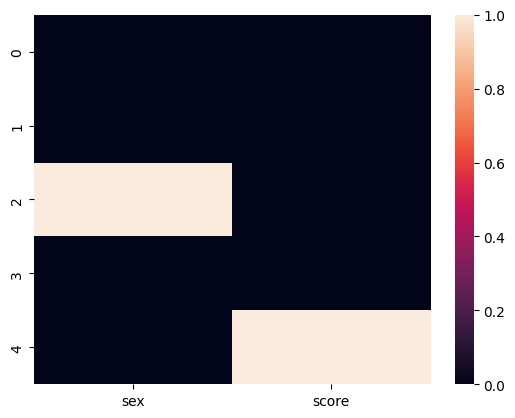

In [33]:
import seaborn as sns

sns.heatmap(df.isna())#isna()의 값(불리안)을 색으로 나타내어 시각화

<Axes: >

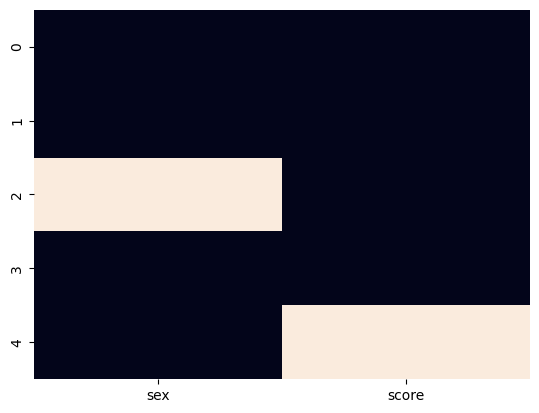

In [35]:
sns.heatmap(df.isnull(), cbar=False)

<Axes: >

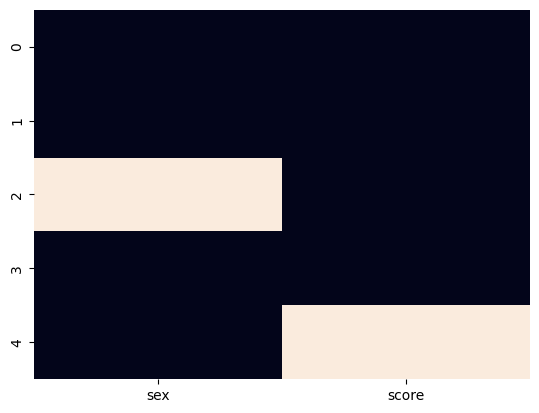

In [38]:
sns.heatmap(df.isnull(), cbar=False)

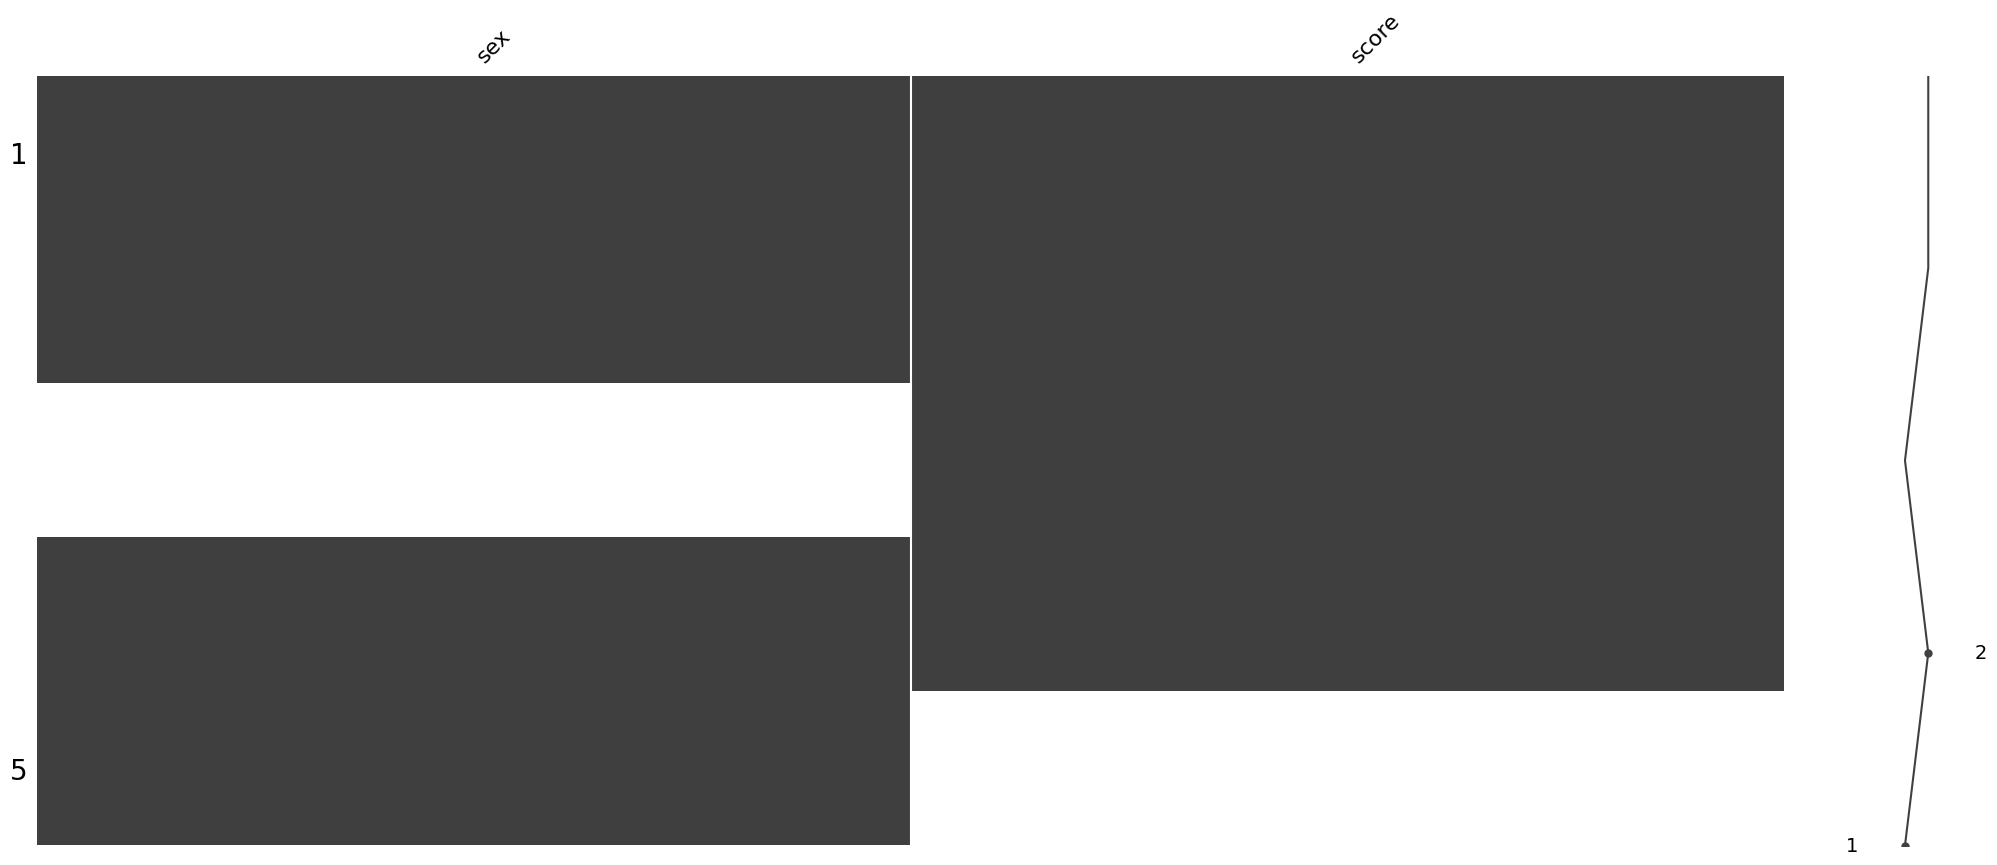

In [39]:
import missingno as msno
msno.matrix(df); #맨 뒤의 선은 아닌것(검은것)의 개수를  나타낸것

<Axes: >

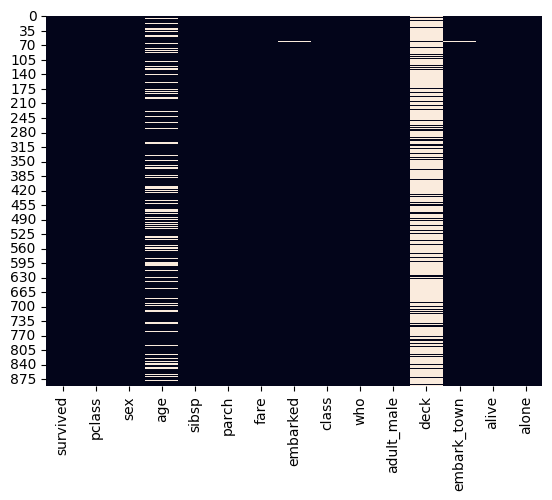

In [41]:
tdf = sns.load_dataset('titanic')
sns.heatmap(tdf.isnull(), cbar=False) #결측값이 하얀선으로 나타남

<Axes: >

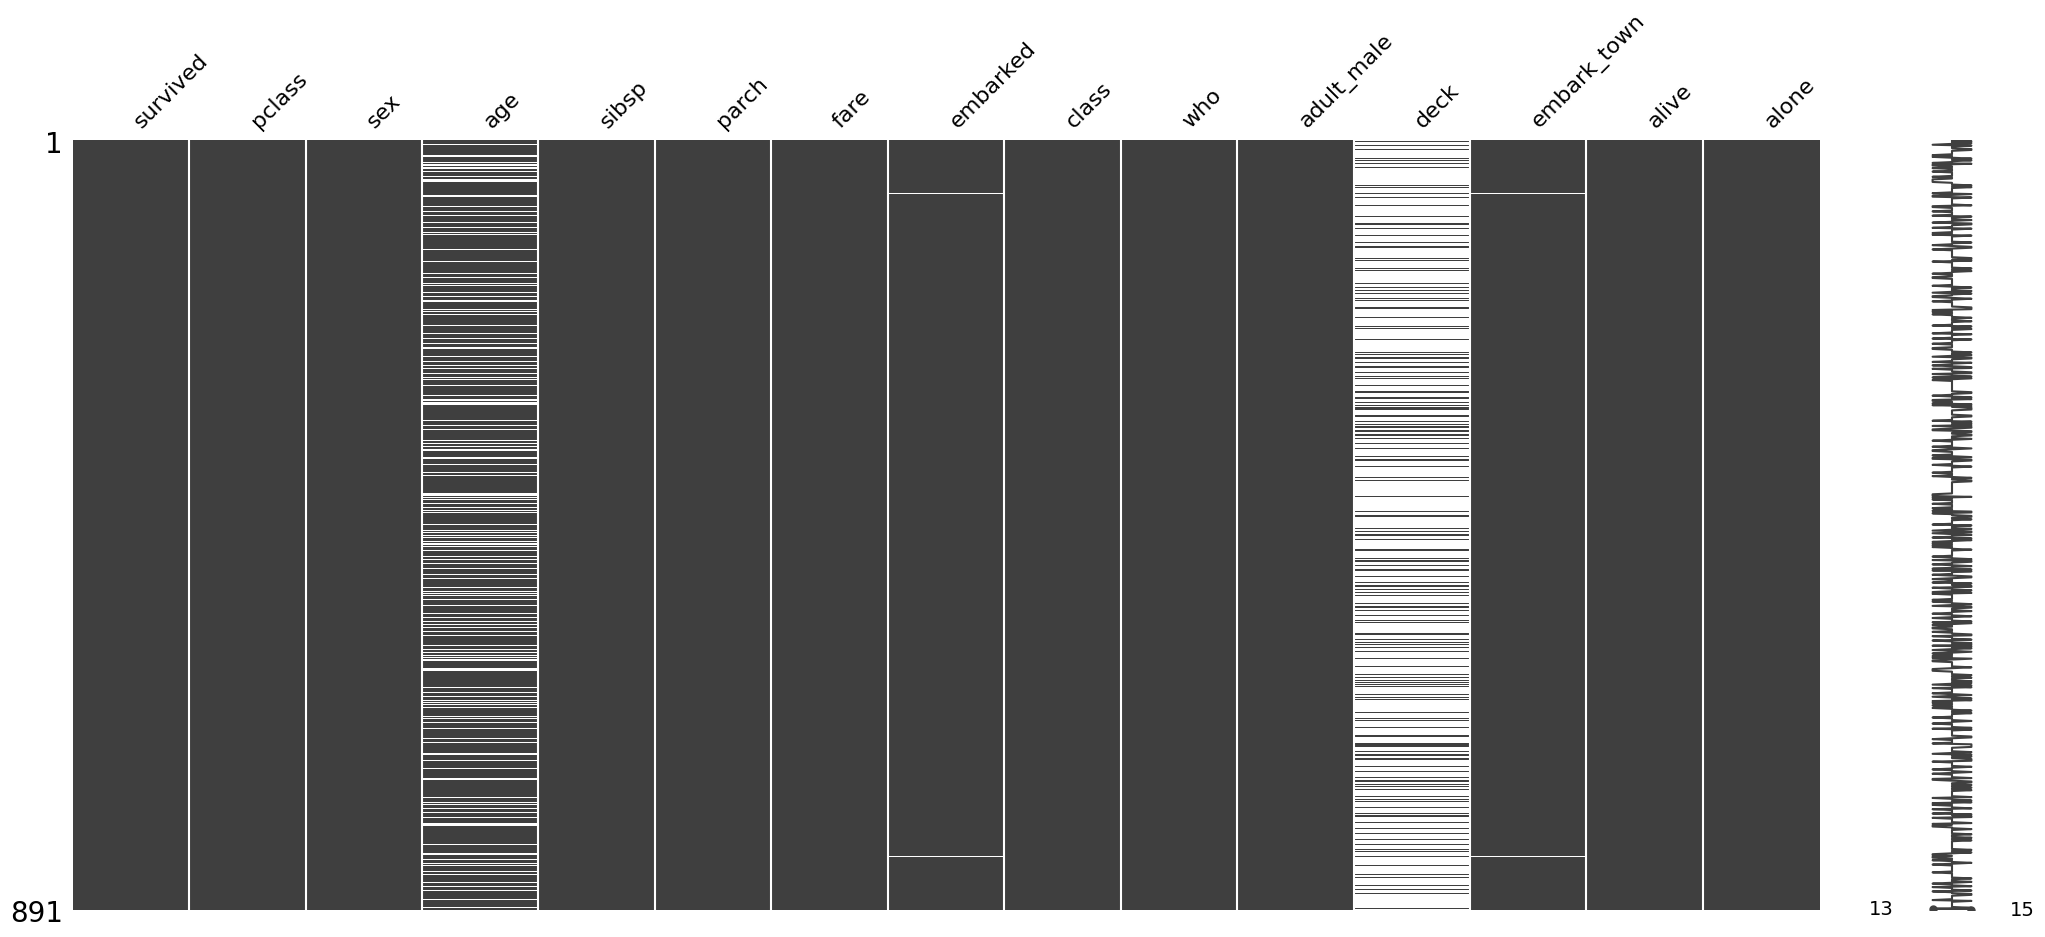

In [42]:
msno.matrix(tdf)

-오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다.
-행마다 15개중 NaN이 아닌 유효한 데이터의 갯수를 나타내고
그 점을 다음 행과 연결한 선

In [43]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [44]:
tdf2 = tdf.sample(20)
tdf2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
575,0,3,male,19.0,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,True
430,1,1,male,28.0,0,0,26.5500,S,First,man,True,C,Southampton,yes,True
516,1,2,female,34.0,0,0,10.5000,S,Second,woman,False,F,Southampton,yes,True
309,1,1,female,30.0,0,0,56.9292,C,First,woman,False,E,Cherbourg,yes,True
786,1,3,female,18.0,0,0,7.4958,S,Third,woman,False,NaN,Southampton,yes,True
552,0,3,male,NaN,0,0,7.8292,Q,Third,man,True,NaN,Queenstown,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
354,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
754,1,2,female,48.0,1,2,65.0000,S,Second,woman,False,NaN,Southampton,yes,False
739,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

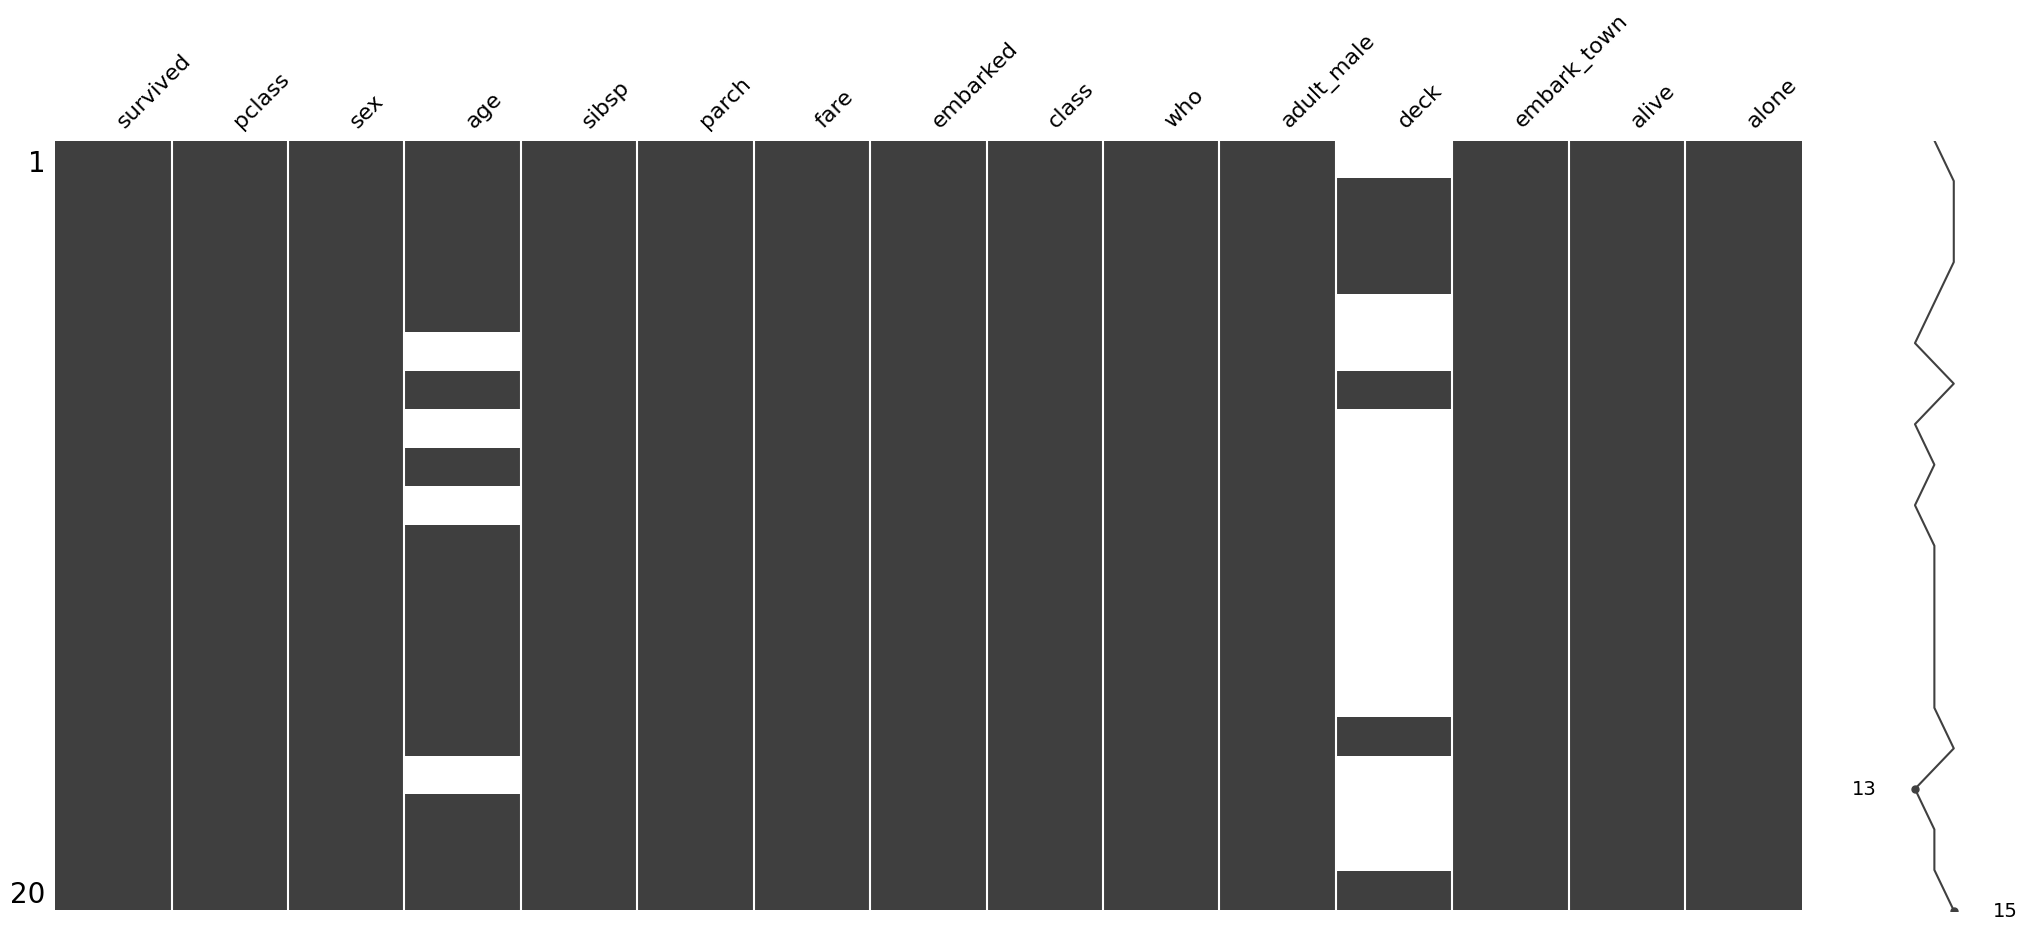

In [45]:
msno.matrix(tdf2)

In [46]:
#NaN이 1개인 행을 추출, 뒤에 숫자만 바꾼다면 몇개든 자유롭게 가능

tdf[tdf.isna().sum(axis=1) == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


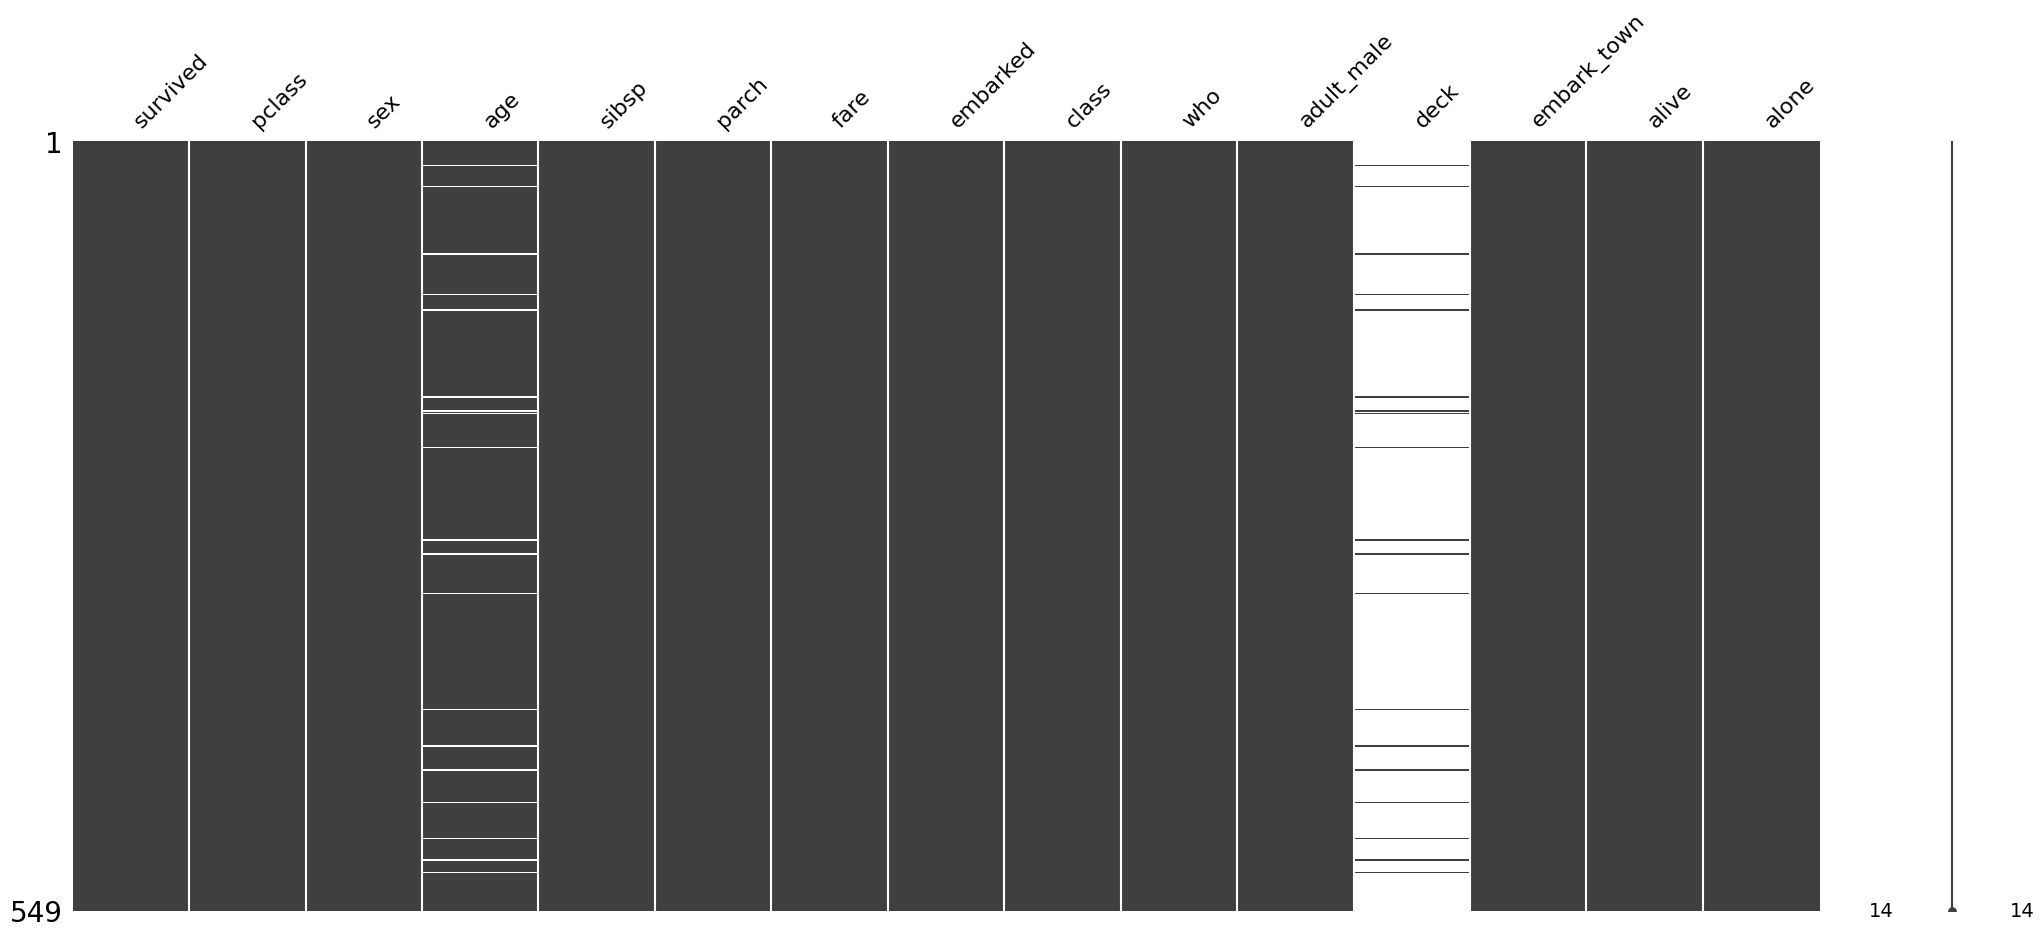

In [47]:
msno.matrix( tdf[tdf.isna().sum(axis=1) == 1] );

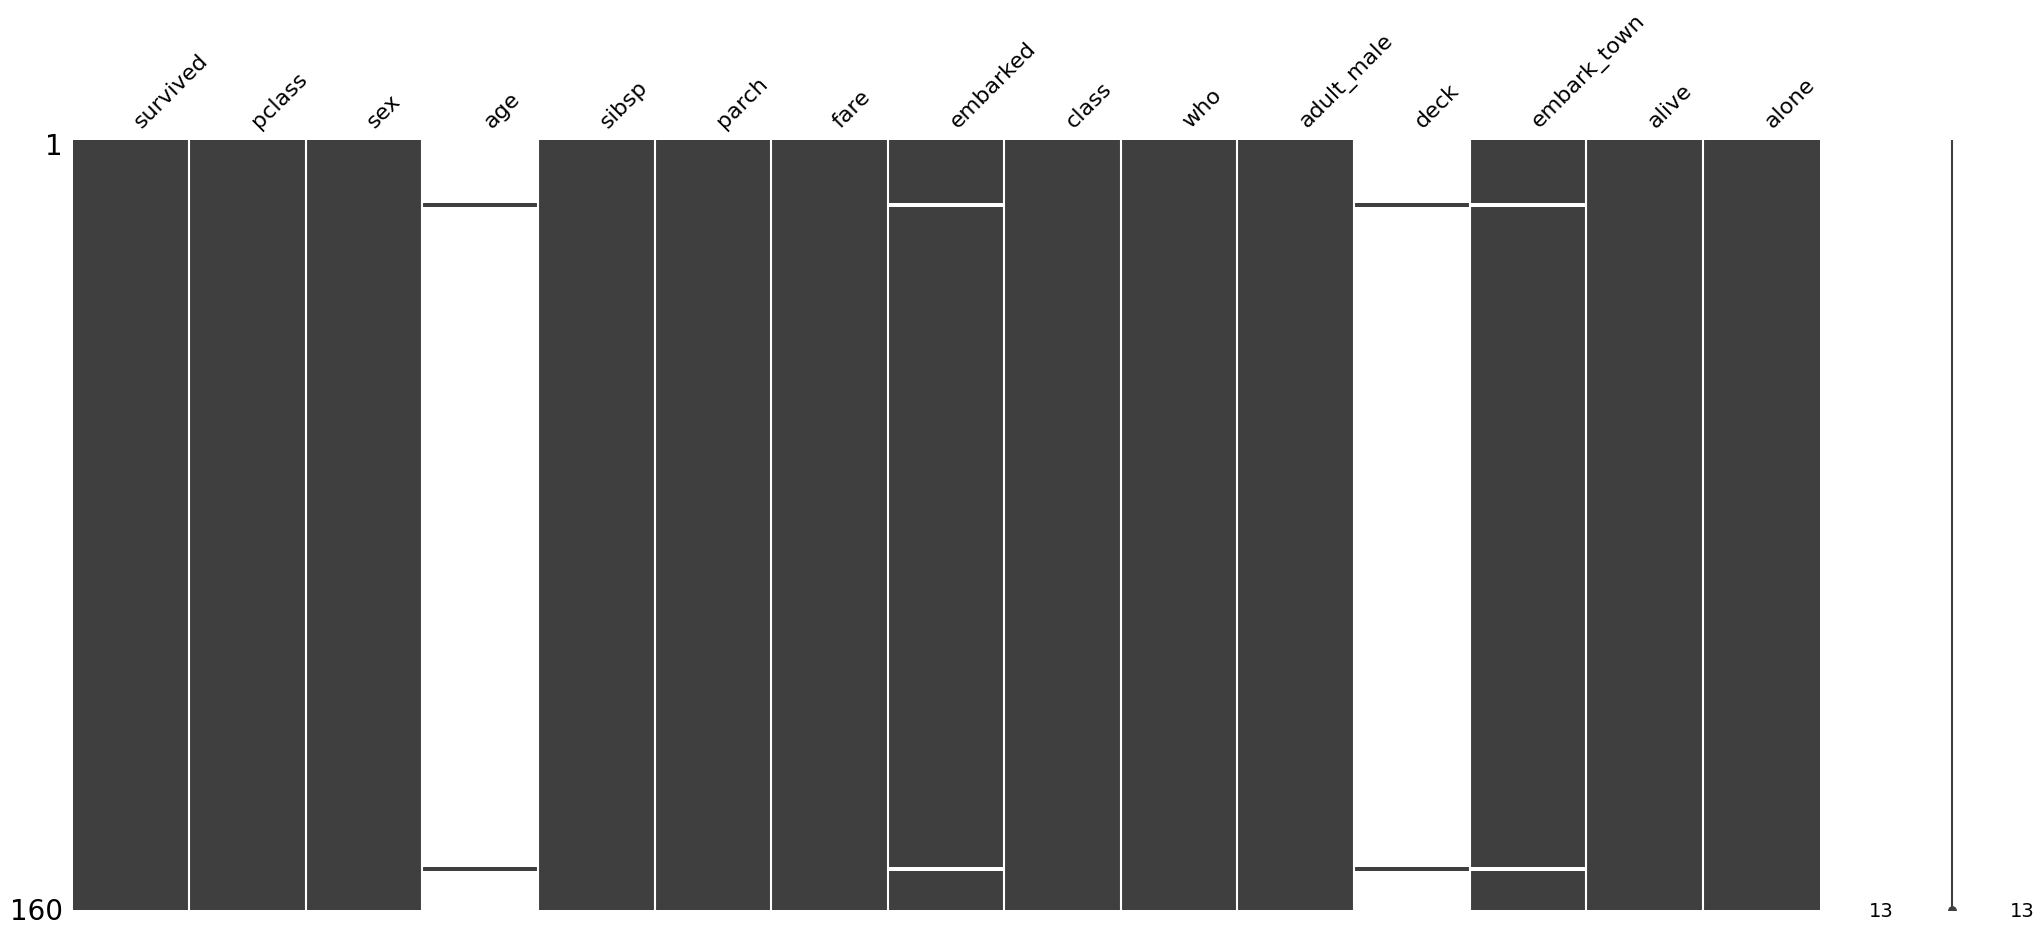

In [48]:
msno.matrix( tdf[tdf.isna().sum(axis=1) == 2] );

In [49]:
# 열 embarked가 NaN인 행 추출
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [51]:
# 두 열, age, deck이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [52]:
# 세 개 열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [53]:
 # 최소한 1개의 NaN에 있는 행 추출
 tdf[tdf.isna( ).any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


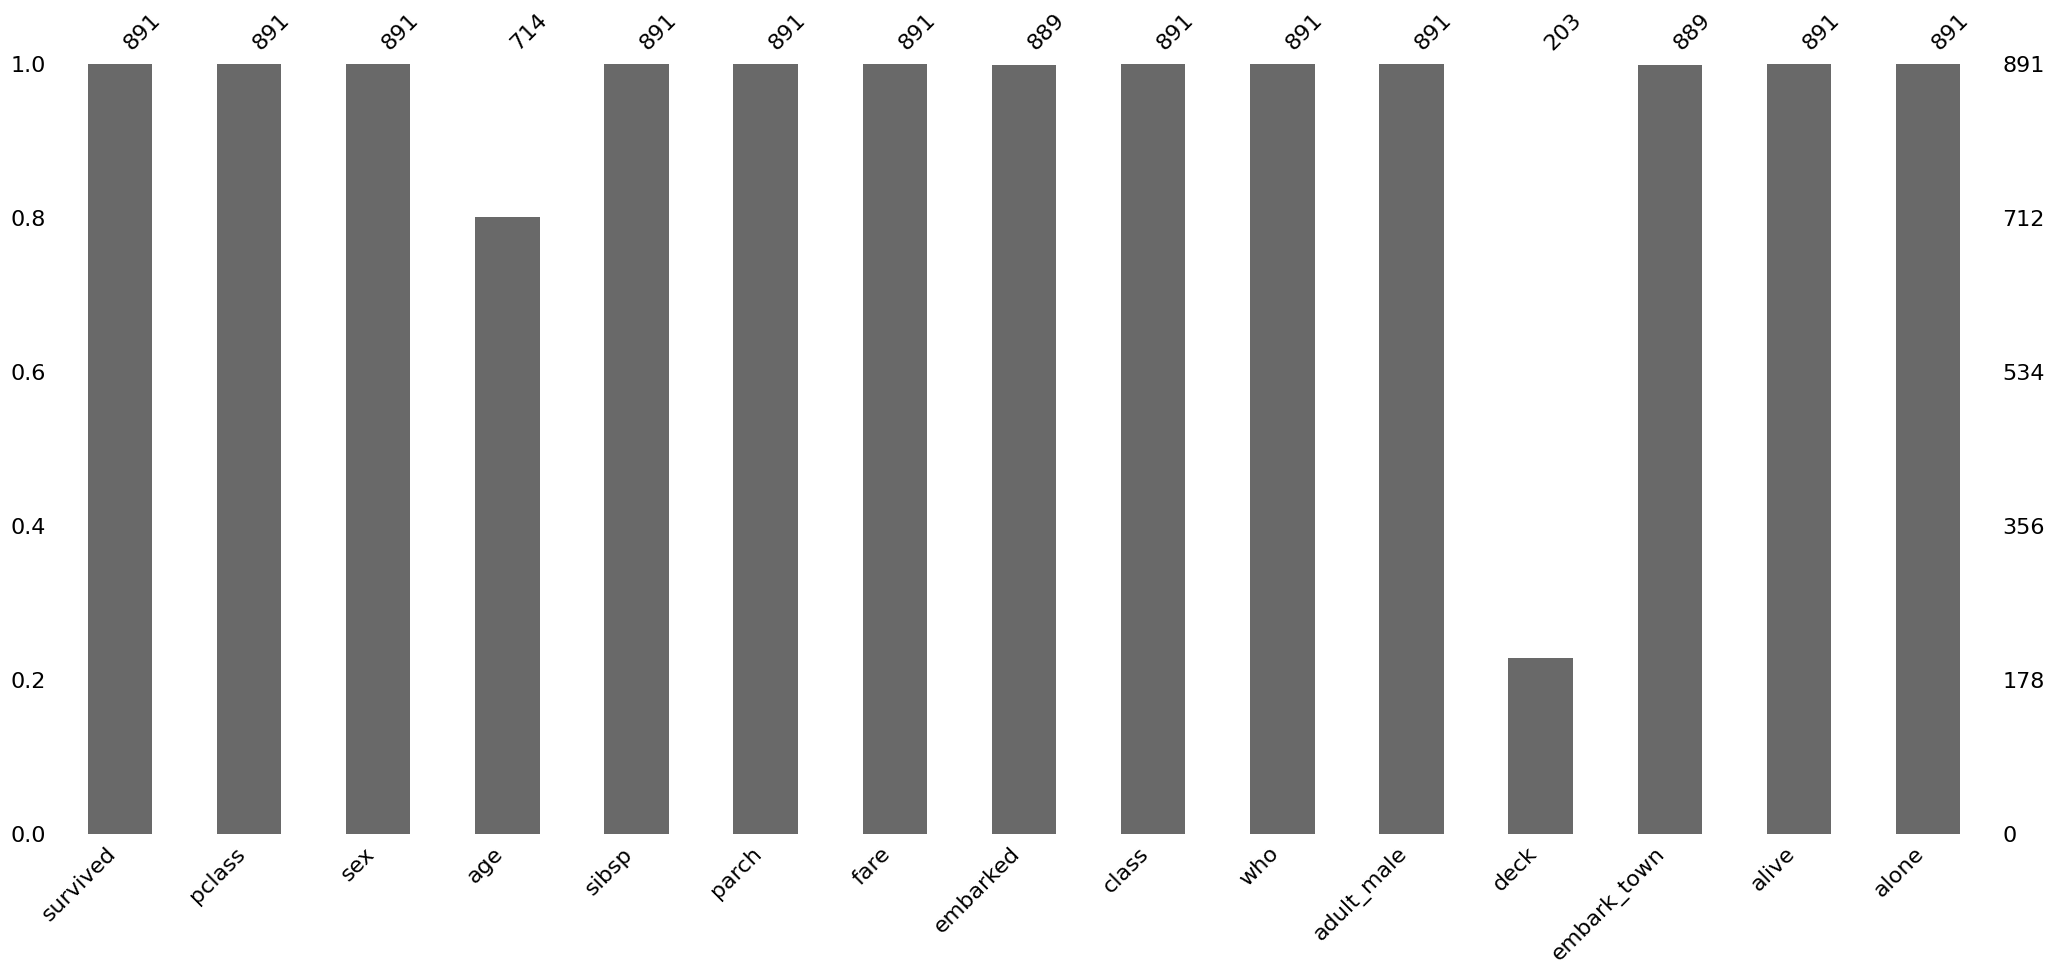

In [54]:
msno.bar(tdf);

<Axes: >

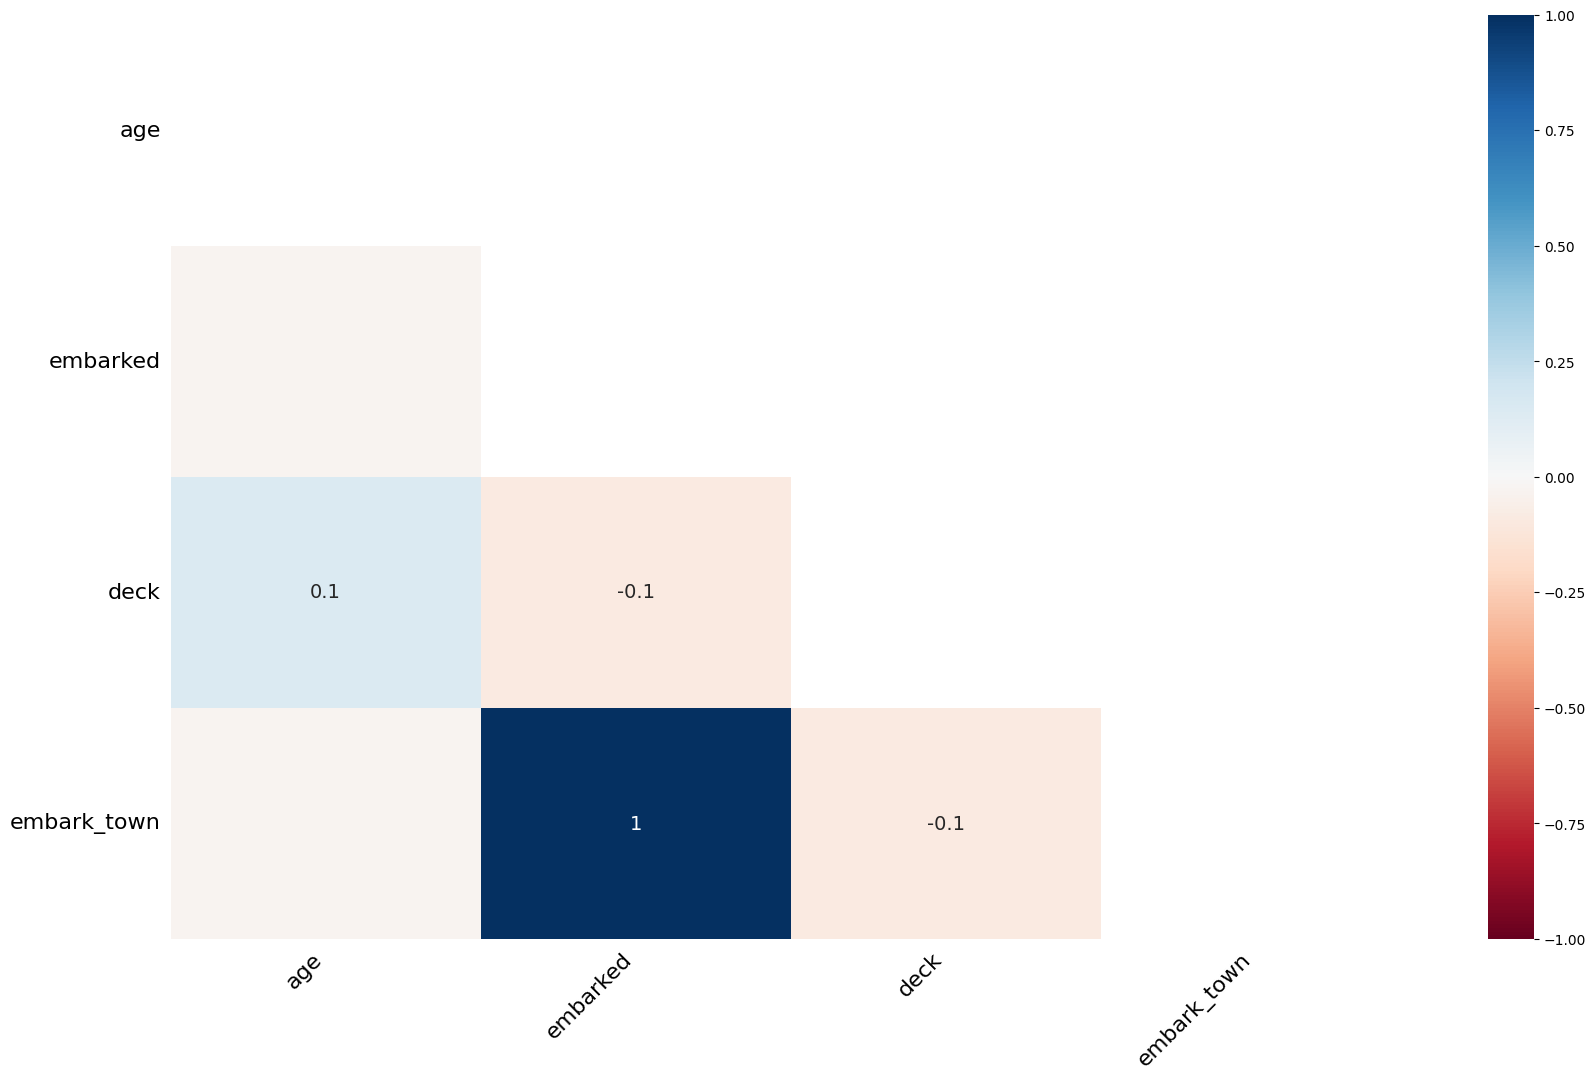

In [57]:
msno.heatmap(tdf)


##시험범위 끝